In [2]:
# import librias for analysis
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib inline

In [3]:
# set date
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2018,12,31)

In [4]:
# get sotcks, bitcoin and funds
stock_dict = {
    #Tech
    'Google': pdr.DataReader('GOOGL', 'yahoo', start_date, end_date),
    'Apple': pdr.DataReader('AAPL', 'yahoo', start_date, end_date),
    'Amazon': pdr.DataReader('AMZN', 'yahoo', start_date, end_date),
    'Facebook': pdr.DataReader('FB', 'yahoo', start_date, end_date),
    'Salesforce': pdr.DataReader('CRM', 'yahoo', start_date, end_date),
    'Intel': pdr.DataReader('INTC', 'yahoo', start_date, end_date),
    'Snapchat': pdr.DataReader('SNAP', 'yahoo', start_date, end_date),
    #Financial
    'Bank of America': pdr.DataReader('BAC', 'yahoo', start_date, end_date),
    'JPMorgan': pdr.DataReader('JPM', 'yahoo', start_date, end_date),
    'HSBC': pdr.DataReader('HSBC', 'yahoo', start_date, end_date),
    'Citigroup': pdr.DataReader('C', 'yahoo', start_date, end_date),
    'Wells Fargo': pdr.DataReader('WFC', 'yahoo', start_date, end_date),
    'Capital One': pdr.DataReader('COF', 'yahoo', start_date, end_date),
    #Crycur
    'Bitcoin': pdr.DataReader('BTC-USD', 'yahoo', start_date, end_date),
    'Etherium': pdr.DataReader('ETH-USD', 'yahoo', start_date, end_date),
    'Litecoin': pdr.DataReader('LTC-USD', 'yahoo', start_date, end_date),
    'Bitcoin Cash': pdr.DataReader('BCH-USD', 'yahoo', start_date, end_date),
    'Etherium classic': pdr.DataReader('ETC-USD', 'yahoo', start_date, end_date),
    #Index Funds
    'S&P 500': pdr.DataReader('^GSPC', 'yahoo', start_date, end_date),
    "Dow 30": pdr.DataReader('^DJI', 'yahoo', start_date, end_date),
    'Nasdaq': pdr.DataReader('^IXIC', 'yahoo', start_date, end_date),
    'Russell 2000': pdr.DataReader('^RUT', 'yahoo', start_date, end_date),
    'Vix': pdr.DataReader('^VIX', 'yahoo', start_date, end_date),
    #Other
    'The Boeing Company': pdr.DataReader('BA', 'yahoo', start_date, end_date),
    'Delta': pdr.DataReader('DAL', 'yahoo', start_date, end_date),
    'Disney': pdr.DataReader('EXPE', 'yahoo', start_date, end_date),
    'Expedia': pdr.DataReader('IMAX', 'yahoo', start_date, end_date),
    'Ctrip': pdr.DataReader('CTRP', 'yahoo', start_date, end_date),
    'Marriott': pdr.DataReader('MAR', 'yahoo', start_date, end_date),
    'Netflix': pdr.DataReader('NFLX', 'yahoo', start_date, end_date)
}

In [5]:
# since bitcoins has 366 transactions while stocks only have 251,
# so additional rows are deleted here
def remove_date(d, crycur):
    cols = []
    for i in d[crycur].index:
        if i not in d['Google'].index:
            cols.append(i)
    stock_dict[crycur].drop(cols, inplace=True)

remove_date(stock_dict,'Bitcoin')
print(len(stock_dict['Bitcoin']))

251


In [6]:
remove_date(stock_dict,'Etherium')
print(len(stock_dict['Etherium']))

251


In [7]:
remove_date(stock_dict,'Litecoin')
print(len(stock_dict['Litecoin']))

251


In [8]:
remove_date(stock_dict,'Bitcoin Cash')
print(len(stock_dict['Bitcoin Cash']))

251


In [9]:
remove_date(stock_dict,'Etherium classic')
print(len(stock_dict['Etherium classic']))

251


In [10]:
# create the change column and put all the data into one table
df_change = pd.DataFrame()
for i in stock_dict:
    df_change[i] = (stock_dict[i].Close - stock_dict[i].Open)/stock_dict[i].Open

df_change

,Google,Apple,Amazon,Facebook,Salesforce,Intel,Snapchat,Bank of America,JPMorgan,HSBC,...,Nasdaq,Russell 2000,Vix,The Boeing Company,Delta,Disney,Expedia,Ctrip,Marriott,Netflix
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.019173,0.012341,0.014514,0.021049,0.014872,0.010134,0.017699,0.005042,0.002973,0.007885,...,0.009982,0.009042,-0.107762,0.003686,0.007994,0.006466,-0.002151,0.021508,-0.015748,0.025344
2018-01-03,0.016379,-0.001739,0.013380,0.015340,0.003718,-0.004618,0.020667,-0.003344,0.001854,0.009290,...,0.006906,0.001484,-0.042887,0.006285,-0.013813,0.005543,-0.008602,-0.002141,0.018208,0.014848
2018-01-04,-0.001212,0.002840,0.003809,-0.003083,0.006415,0.020910,-0.011518,0.007341,0.006275,0.004035,...,-0.001635,0.001764,0.023307,-0.004263,-0.000718,0.001747,-0.030108,-0.024694,-0.008403,-0.002764
2018-01-05,0.006199,0.008994,0.009552,0.006789,0.003155,0.006977,-0.000689,-0.001317,-0.008420,0.002883,...,0.004337,0.002661,0.013187,0.040671,0.004487,0.005140,-0.031042,0.018272,-0.015024,0.013221
2018-01-08,0.002889,0.000000,0.008794,0.005769,0.007963,0.010617,-0.010556,-0.003639,0.003236,0.002324,...,0.003085,0.001289,-0.009365,0.004827,-0.022174,0.013037,-0.034803,-0.010275,0.016628,0.009666
2018-01-09,-0.005052,-0.001260,-0.003342,-0.004399,0.001376,-0.024161,-0.003534,0.002318,0.003035,0.003271,...,-0.001479,-0.001357,0.071201,0.025242,-0.011496,-0.008954,-0.016827,0.003579,0.008717,-0.013201
2018-01-10,0.002837,0.006526,0.007373,0.004814,0.001104,-0.019155,0.041222,0.005927,0.007125,0.000742,...,0.003330,0.000507,-0.028684,0.008725,0.020460,-0.007414,0.035443,-0.007995,0.005770,0.023847
2018-01-11,-0.000234,0.003952,0.013447,-0.003344,0.000917,0.014252,0.001372,0.000000,0.001536,0.002400,...,0.006005,0.017030,0.019608,0.018595,0.024869,-0.004615,-0.009804,0.006752,0.020344,0.013766
2018-01-12,0.018512,0.005165,0.024981,0.007357,0.009246,-0.004833,-0.004234,0.010039,0.009136,0.008275,...,0.007338,0.003056,0.043121,0.017646,0.012181,0.015498,0.032419,-0.006876,-0.002355,0.018648


In [11]:
# save to csv 
df_change.to_csv('daily_change.csv',index = False)

In [12]:
# create the correlation table
correlation = df_change.corr()
correlation

,Google,Apple,Amazon,Facebook,Salesforce,Intel,Snapchat,Bank of America,JPMorgan,HSBC,...,Nasdaq,Russell 2000,Vix,The Boeing Company,Delta,Disney,Expedia,Ctrip,Marriott,Netflix
Google,1.000000,0.695979,0.803671,0.771673,0.768895,0.603114,0.352925,0.567882,0.549647,0.609043,...,0.878425,0.637296,-0.548041,0.610214,0.464952,0.558628,0.187755,0.476110,0.613824,0.697071
Apple,0.695979,1.000000,0.758223,0.563363,0.651702,0.590013,0.226381,0.535587,0.530674,0.575210,...,0.822330,0.613333,-0.480424,0.534937,0.413535,0.435064,0.214635,0.345822,0.552372,0.611125
Amazon,0.803671,0.758223,1.000000,0.693428,0.797351,0.634864,0.353325,0.520271,0.505995,0.547714,...,0.883542,0.660992,-0.441758,0.619616,0.487783,0.550139,0.130220,0.417206,0.615190,0.760070
Facebook,0.771673,0.563363,0.693428,1.000000,0.658062,0.533526,0.405574,0.440699,0.423737,0.504670,...,0.749987,0.575610,-0.434565,0.476364,0.396585,0.609477,0.187378,0.395127,0.463996,0.619473
Salesforce,0.768895,0.651702,0.797351,0.658062,1.000000,0.580661,0.397306,0.475859,0.449519,0.491774,...,0.824998,0.573413,-0.423140,0.584489,0.458245,0.541459,0.155545,0.436793,0.605415,0.721625
Intel,0.603114,0.590013,0.634864,0.533526,0.580661,1.000000,0.273012,0.510190,0.541294,0.554113,...,0.759549,0.663581,-0.500427,0.525997,0.477516,0.470317,0.162127,0.303540,0.571639,0.585937
Snapchat,0.352925,0.226381,0.353325,0.405574,0.397306,0.273012,1.000000,0.221970,0.213417,0.270048,...,0.409726,0.331201,-0.165793,0.264312,0.327733,0.420343,0.158813,0.303616,0.301611,0.345482
Bank of America,0.567882,0.535587,0.520271,0.440699,0.475859,0.510190,0.221970,1.000000,0.911097,0.700666,...,0.655144,0.530719,-0.453979,0.535217,0.447333,0.393848,0.155092,0.323151,0.517368,0.453638
JPMorgan,0.549647,0.530674,0.505995,0.423737,0.449519,0.541294,0.213417,0.911097,1.000000,0.742740,...,0.649566,0.543300,-0.516672,0.562073,0.460044,0.404713,0.173399,0.268160,0.492681,0.441305
HSBC,0.609043,0.575210,0.547714,0.504670,0.491774,0.554113,0.270048,0.700666,0.742740,1.000000,...,0.714840,0.630870,-0.557627,0.604861,0.460602,0.448734,0.224114,0.310668,0.564994,0.475302


In [13]:
# find the strongest positive and neagtive correlation
companies = []
for i in correlation:
    companies.append(i)

max_comp1 = ''
max_comp2 = ''
max_corr = 0
min_comp1=''
min_comp2 =''
min_corr = 0
num = len(correlation)

for i in range(0, num):
    for j in range(0, num):
        if correlation[companies[i]][j] ==1:
            continue
        if correlation[companies[i]][j] > max_corr:
            max_corr = correlation[companies[i]][j]
            max_comp1 = companies[i]
            max_comp2 = companies[j]
        if correlation[companies[i]][j]<min_corr:
            min_corr = correlation[companies[i]][j]
            min_comp1 = companies[i]
            min_comp2 = companies[j]
                
print("The strongest positive correlation is between "+str(max_comp1)+" and"+" "+str(max_comp2))
print("The correlation is "+str(max_corr))
print("The strongest negative correlation is between "+str(min_comp1)+" and"+" "+str(min_comp2))
print("The correlation is "+str(min_corr))


The strongest positive correlation is between S&P 500 and Dow 30
The correlation is 0.9650860668759104
The strongest negative correlation is between S&P 500 and Vix
The correlation is -0.7120852164594985


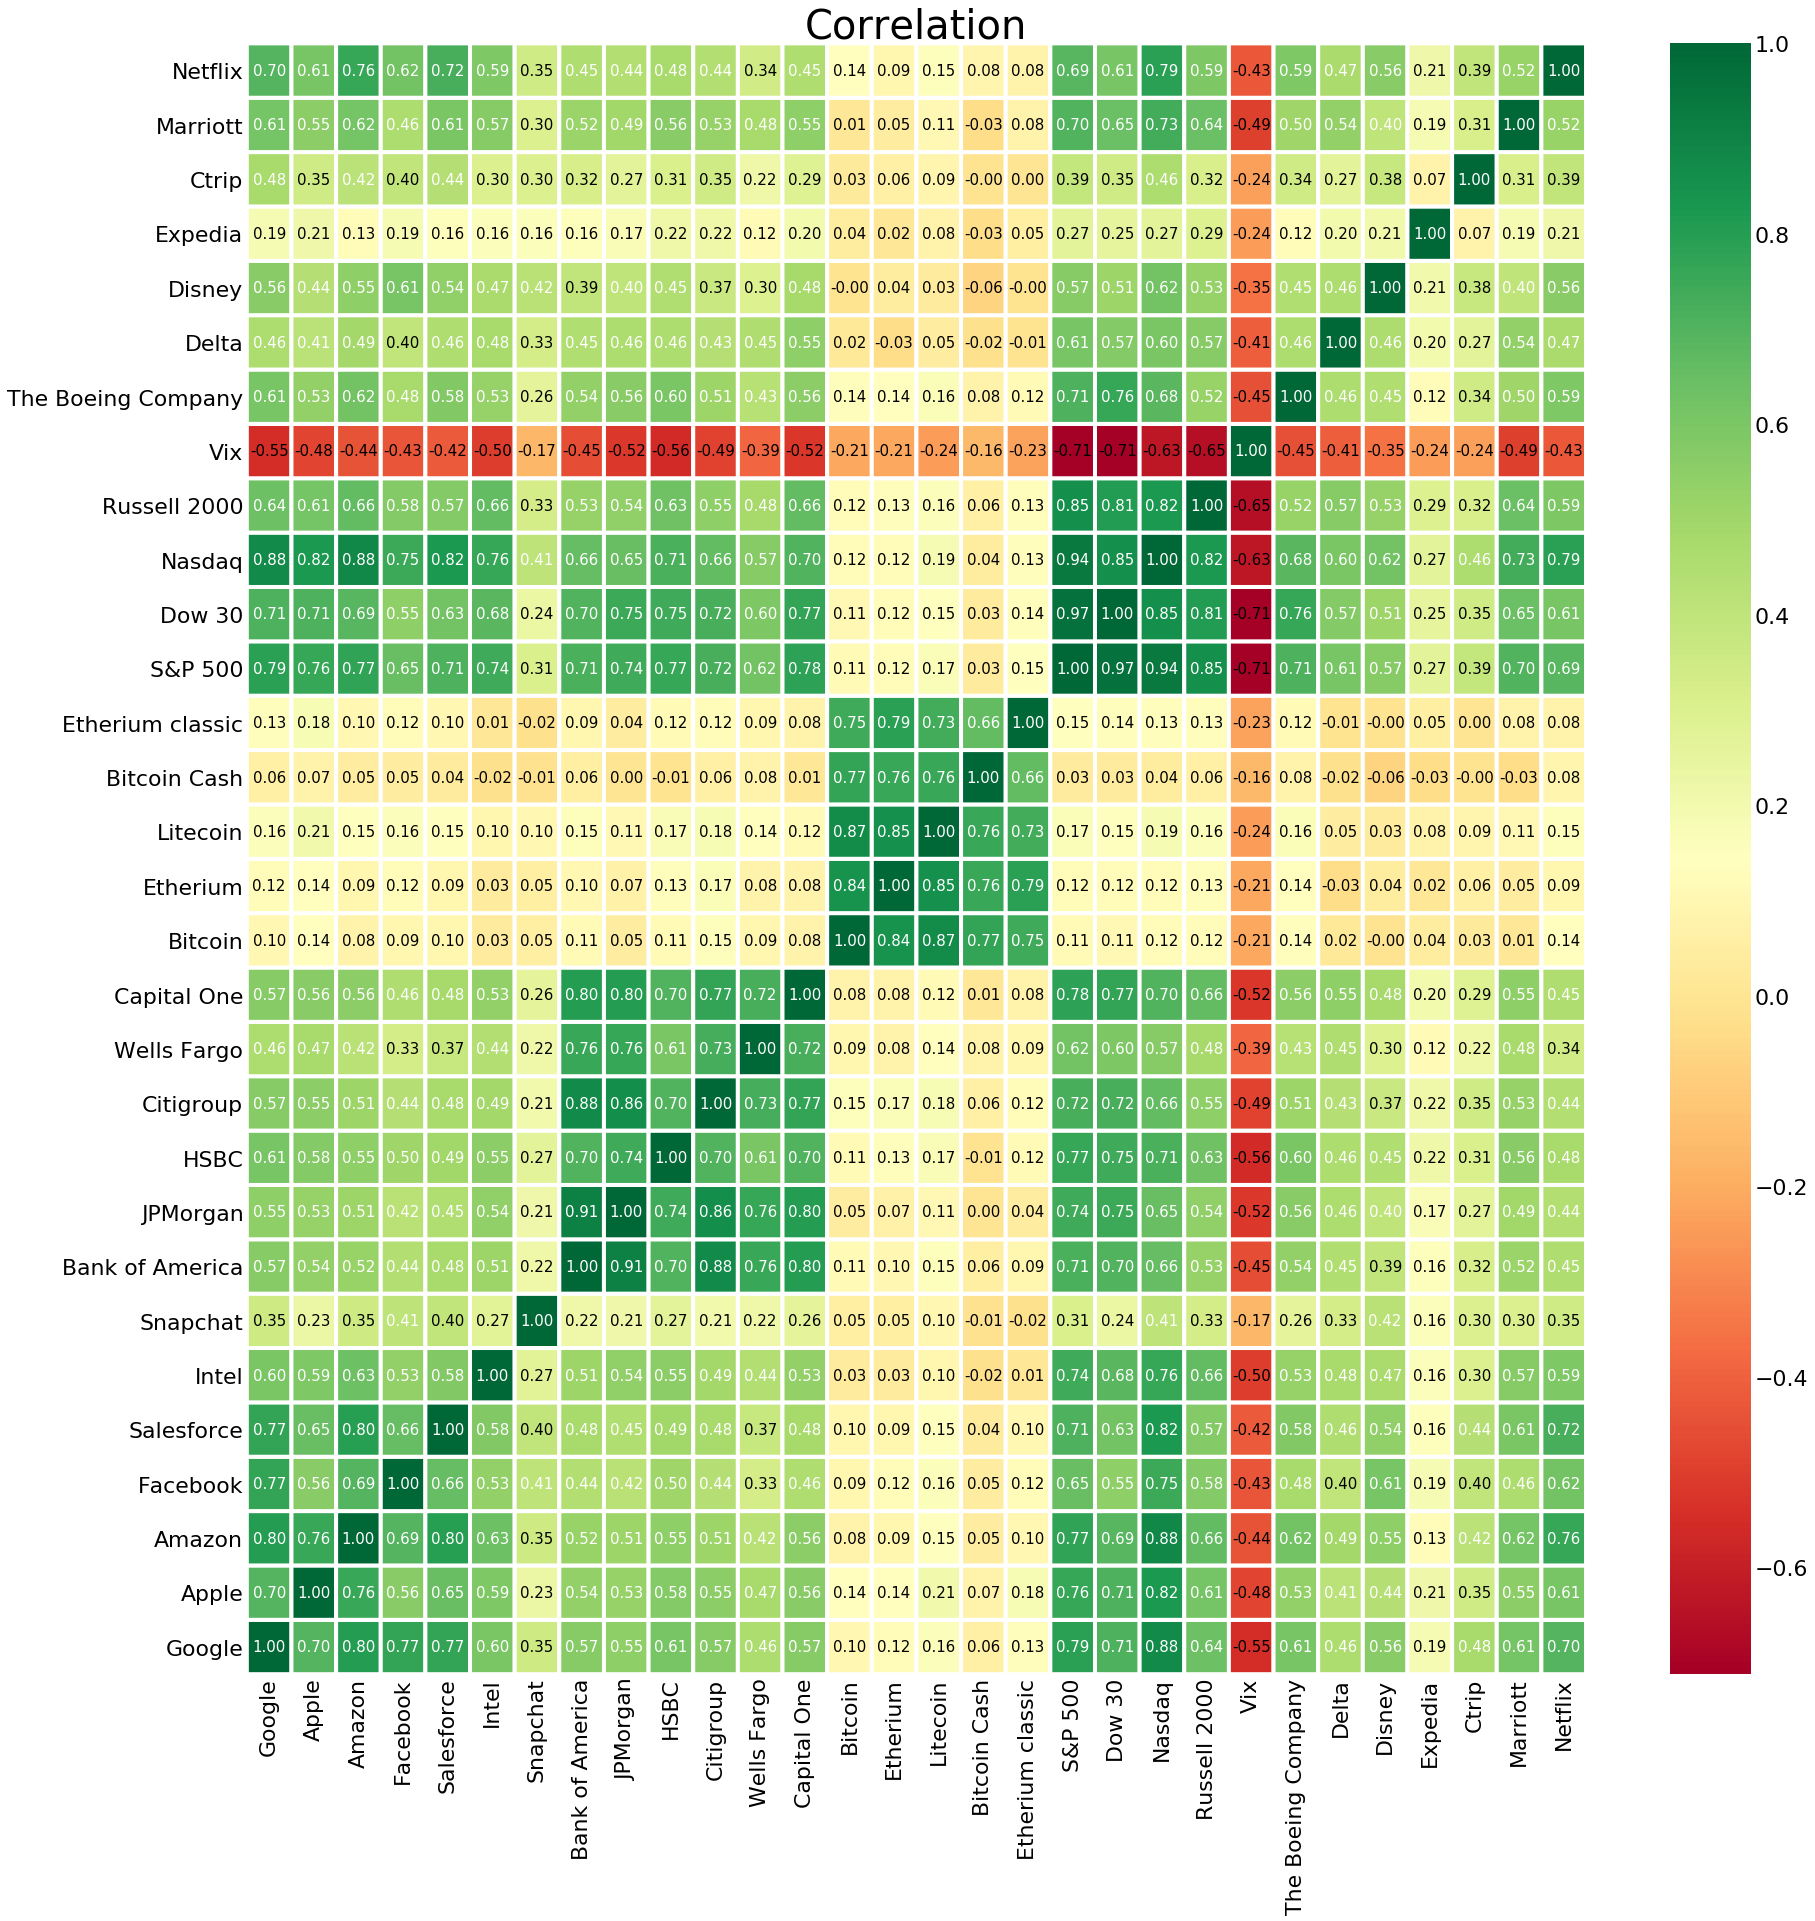

In [17]:
# create a heatmap
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
trace = go.Heatmap(z=correlation)
data = [trace]
py.iplot(data)
plt.figure(figsize=(30,30)) 
heatmap = plt.pcolor(correlation, edgecolors='white', linewidth=4, cmap='RdYlGn')
for y in range(len(correlation)):
    for x in range(len(correlation)): 
        value = correlation.iloc[y].iloc[x]
        color = 'white' if value > 0.4 else 'black'
        plt.text(x + 0.5, y + 0.5, '%.2f' % value,
                 horizontalalignment='center',
                 verticalalignment='center', fontsize=15, color=color
                 )
#plt.gca().axis('off')
plt.box(False)
tick_locations = [x + 0.5 for x in range(len(correlation))]
# set up the labels
plt.gca().tick_params(axis=u'both', which=u'both',length=0) 
plt.gca().set_xticks(tick_locations)
plt.gca().set_yticks(tick_locations)
plt.gca().set_yticklabels(correlation.index.values, fontsize=22)
plt.gca().set_xticklabels(correlation.index.values, rotation='vertical', fontsize=22)
plt.title("Correlation", fontsize=40)
cb = plt.colorbar(heatmap, drawedges=False)
cb.outline.set_linewidth(0)
cb.ax.tick_params(labelsize=22, length=0)

the intercept of the pair with the strongest positive correlation is [9.12344929e-05]
the slope the pair with the strongest positive correlation is [[1.02539954]]
the R2 of the pair with the strongest positive correlation is 0.9313911164780145
the Mean squared error of the pair with the strongest positive correlation is 7.114867178375827e-06


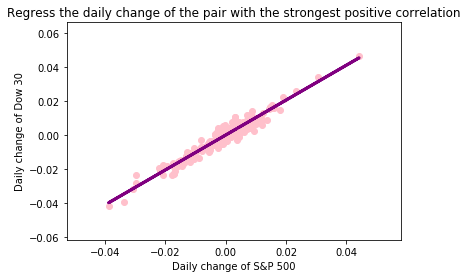

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Regression analysis of the pair with the strongest positive correlation

#change the dataframes into arrays
x=df_change[max_comp1].values
y=df_change[max_comp2].values
x = x.reshape(251,1)
y = y.reshape(251,1)

#regression analysis
reg.fit(x,y)
# intercept
a = reg.intercept_
# slope 
b = reg.coef_
# the R2 
score  = reg.score(x,y)

from sklearn.metrics import mean_squared_error
# the mean squared error 
err = mean_squared_error(y,reg.predict(x))

#graph 
plt.scatter(x,y,color='pink')
plt.plot(x,reg.predict(x),color='purple',linewidth=3)

#set the size to make it easy to read 
plt.rcParams["figure.figsize"] = [15, 6.0]

#add the title and lables
plt.title("Regress the daily change of the pair with the strongest positive correlation")
plt.xlabel("Daily change of S&P 500")
plt.ylabel("Daily change of Dow 30")

#print out the results 
print("the intercept of the pair with the strongest positive correlation is",a)
print("the slope the pair with the strongest positive correlation is",b)
print("the R2 of the pair with the strongest positive correlation is",score)
print("the Mean squared error of the pair with the strongest positive correlation is",err)

the intercept the pair with the strongest negative correlation is [-0.00058535]
the slope the pair with the strongest negative correlation is [[-7.59897905]]
the R2 of the pair with the strongest negative correlation is 0.5070653555001703
the Mean squared error of the pair with the strongest negative correlation is 0.005156656417288603


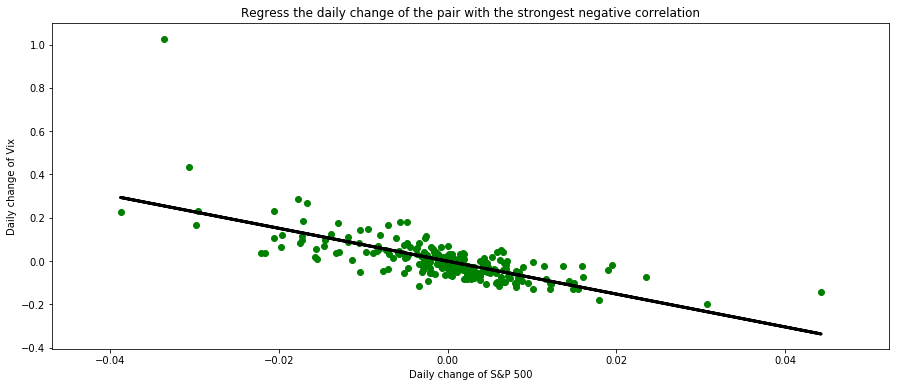

In [15]:

# the same thing with the pair of the strongest negative correlation 

x1=df_change[min_comp1].values
y1=df_change[min_comp2].values
x1 = x1.reshape(251,1)
y1 = y1.reshape(251,1)
reg.fit(x1,y1)
a1 = reg.intercept_
b1 = reg.coef_
score1  = reg.score(x1,y1)

err1 = mean_squared_error(y1,reg.predict(x1))

plt.scatter(x1,y1,color='green')
plt.plot(x,reg.predict(x),color='black',linewidth=3)


plt.rcParams["figure.figsize"] = [15, 6.0]
plt.title("Regress the daily change of the pair with the strongest negative correlation")

plt.xlabel("Daily change of S&P 500")
plt.ylabel("Daily change of Vix")
print("the intercept the pair with the strongest negative correlation is",a1)
print("the slope the pair with the strongest negative correlation is",b1)
print("the R2 of the pair with the strongest negative correlation is",score1)
print("the Mean squared error of the pair with the strongest negative correlation is",err1)

In [16]:
#Conclusion :
#the intercept and slope of the pair with the strongest positive correlation is 9.12344929e-05 ,1.02539954
#the intercept and slope of the pair with the strongest negative correlation is -0.00058535 ,-7.59897905
#the R2 and the Mean squared error of the pair with the strongest positive correlation is 0.9313911164780145,7.114867178375827e-06
#the R2 and the Mean squared error of the pair with the strongest negative correlation 0.5070653555001703,0.005156656417288603


In [17]:
# Using the closing prices from this week,which is 2019,5,1-2019,5,8,to test your equation.
# use the different the datatime
start_date1 = dt.datetime(2019,5,1)
end_date1 = dt.datetime(2019,5,8)
stock_test = {'S&P 500': pdr.DataReader('^GSPC', 'yahoo', start_date1, end_date1),
              "Dow 30": pdr.DataReader('^DJI', 'yahoo', start_date1, end_date1)}


In [18]:
# create the change column and put all the data into one table
df_test = pd.DataFrame()
for i in stock_test:
    df_test[i] = (stock_test[i].Close - stock_test[i].Open)/stock_test[i].Open


In [19]:
df_test

,S&P 500,Dow 30
Date,,
2019-05-01,-0.009687,-0.007843
2019-05-02,-0.001588,-0.003763
2019-05-03,0.005609,0.004769
2019-05-06,0.008106,0.010621
2019-05-07,-0.009948,-0.011866
2019-05-08,-0.000066,0.001293
2019-05-09,0.003804,-0.001951


The Mean squared error of the strongest positive correlation pair's predection is 0.0032404817775387395


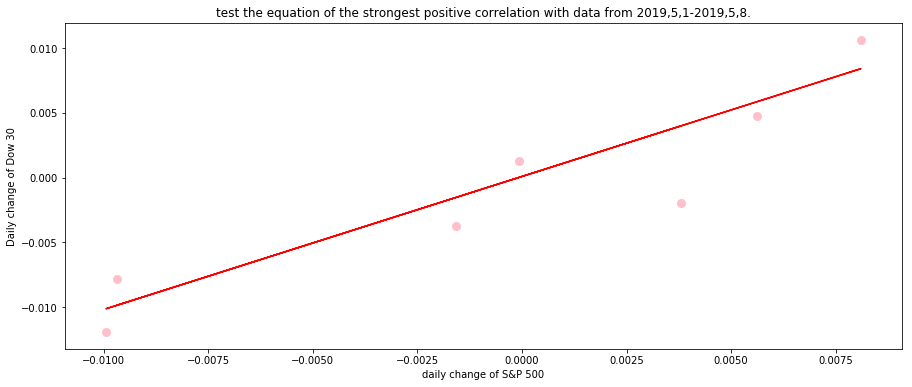

In [22]:
    
x2=df_test[max_comp1].values
y2=df_test[max_comp2].values
x2 = x2.reshape(7,1)
y2 = y2.reshape(7,1)

#test the equation of the strongest positive correlation with data from 2019,5,1-2019,5,8.

err3 = mean_squared_error(y2,reg.predict(x2))

y = a + b * x2
plt.plot(x2,y,color = 'red')
plt.scatter(x2,y2,color='pink',linewidth=3)
plt.rcParams["figure.figsize"] = [15, 6.0]
plt.title("test the equation of the strongest positive correlation with data from 2019,5,1-2019,5,8.")
plt.xlabel("daily change of S&P 500")
plt.ylabel("Daily change of Dow 30")

print("The Mean squared error of the strongest positive correlation pair's predection is",err3)

In [24]:

# the same thing with the pair of the strongest negative correlation 

stock_test1 = {'S&P 500': pdr.DataReader('^GSPC', 'yahoo', start_date1, end_date1),
    "Vix": pdr.DataReader('^VIX', 'yahoo', start_date1, end_date1)}


In [25]:
# get the testing data
df_test1 = pd.DataFrame()
for i in stock_test1:
    df_test1[i] = (stock_test1[i].Close - stock_test1[i].Open)/stock_test1[i].Open

In [26]:
df_test1

,S&P 500,Vix
Date,,
2019-05-01,-0.009687,0.150855
2019-05-02,-0.001588,0.004878
2019-05-03,0.005609,-0.087881
2019-05-06,0.008106,0.197828
2019-05-07,-0.009948,0.215094
2019-05-08,-0.000066,0.023747
2019-05-09,0.003804,-0.107477


The Mean squared error of the strongest negative correlation pair's predection is 0.014567800749440597


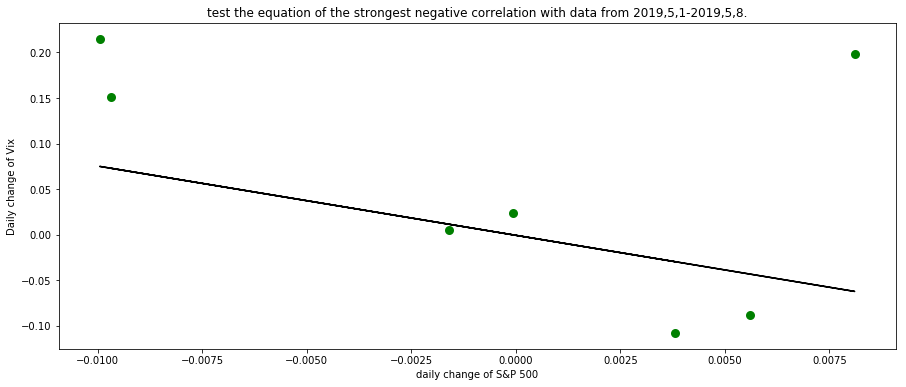

In [28]:
# test the equation

x3=df_test1[min_comp1].values
y3=df_test1[min_comp2].values
x3 = x3.reshape(7,1)
y3 = y3.reshape(7,1)

err4 = mean_squared_error(y3,reg.predict(x3))

y = a1 + b1 * x3
plt.plot(x3,y,color='black')
plt.scatter(x3,y3,color='green',linewidth=3)
plt.rcParams["figure.figsize"] = [15, 6.0]
plt.title("test the equation of the strongest negative correlation with data from 2019,5,1-2019,5,8.")
plt.xlabel("daily change of S&P 500")
plt.ylabel("Daily change of Vix")

print("The Mean squared error of the strongest negative correlation pair's predection is",err4)